In [1]:
#command line interface intput:
#python3 read_file_and_plot.py Simulation_time, simulation_time_unit, time_step(eg:ps/ns/fs), simulation_output_file_path, output_filename(eg:test_out1) 

#to test this module: python read_file_and_plot.py 4, 'ps', 'fs', ./dist-end-to-end.agr, 'test_example1'

#inputs description
sys.argv[0] = Simulation_time,
sys.argv[1] = simulation_time_unit(ps), 
sys.argv[2] = time_step(eg:ps/ns/fs), 
sys.argv[3] = simulation_output_file_path, 
sys.argv[4] = output_filename(eg:density_out1)

In [2]:
import sys
import pandas as pd
import  matplotlib.pyplot as plt
import numpy as np

In [3]:
class read_file_and_plot:
    def __init__(self, tsim, tsim_unit, tstep, file_path, out_filename):
        self.tsim = tsim
        self.tsim_unit = tsim_unit
        self.tstep = tstep
        self.file_path = file_path
        self.out_filename = out_filename
        
    def output(self):
        self.sim_file_to_dataframe()
    
    def sim_file_to_dataframe(self):
        # create the pd dataframe from the given text file
        
        df_file1 = pd.DataFrame(index = None, columns = ['step', 'Param_val']) #create empty df to read the simulation output
        columns = list(df_file1.columns)
        
        special_characters = "!@#$%^&*'(-+?_=,<>/"

        with open(self.file_path) as f:
            for line in f:
                if line[0] not in special_characters:
                    tmp_ls = line.split() #this is the list of num as string
                    tmp_ls = [float(x) for x in tmp_ls]
                    df_file1.loc[len(df_file1)] = tmp_ls #append the list of floats in df
                    
        #get the required time step dataframe
        num_Tstep = df_file1['step'][-1:]
        
        #converting simulation frame into time step:
        df_file1['time_step' + '(' + self.tsim_unit + ')'] = df_file1.apply(lambda row: row.step * self.tsim, axis = 1)
        df_file1['time_step' + '(' + self.tsim_unit + ')'].astype(int)
        
        
        self. find_multiplier(df_file1)
        
    #convert between units:                          
    def find_multiplier(self, df_file1):          
        ls_unit = ['fs', 'ps', 'ns', 'ms']
        if ls_unit.index(self.tstep) > ls_unit.index(self.tsim_unit):
            multiplier = 10 **(-3 * ls_unit.index(self.tstep))
            
            
        elif ls_unit.index(self.tstep) == ls_unit.index(self.tsim_unit):
            multiplier = 1
            
        else:
            reverse_ls_unit = ls_unit[::-1]
            multiplier = 10 **(3 * reverse_ls_unit.index(self.tstep))
            
        self.conv_units(multiplier, df_file1)
        
    def conv_units(self, multiplier, df_file1): 
        df_file1['time_step' + '(' + self.tstep + ')'] = df_file1.apply(lambda row:row.step * multiplier *self.tsim, axis = 1)
        df_file1.to_csv('./output/' + self.out_filename + '.csv', sep=',', header=True, index=False)
        self.plot(df_file1)

        #print(df_file1.head(10))
        
    #plot the required graph
    def plot(self, df_file1):
        x = df_file1['time_step' + '(' + self.tstep + ')']
        y = df_file1['Param_val']

        fig, ax = plt.subplots(figsize=(20, 10),)
        ax.plot(x, y, color='black', linewidth=1, linestyle='-',label='test') 
        ax.set_xlim(xmin=0)

        x_label = 'time step' + '(' + self.tstep + ')'#derive x_label 
        ax.set_xlabel(x_label) # Add an x-label to the axes.
        y_label= (self.file_path.rsplit('/')[-1]).rsplit('.')[0] #derive y_label    
        ax.set_ylabel(y_label)  # Add a y-label to the axes.

        ax.set_title(y_label + ' PLOT')  # Add a title to the axes.
        ax.legend(loc='best')

        fig.savefig('output/' + self.out_filename +'.png')
        plt.show()
        
        ##################################################
        max_col = df_file1.shape[1]
        # Create a Pandas Excel writer using XlsxWriter
        excel_file = self.out_filename + '.xlsx'
        sheet_name = self.out_filename
        data = df_file1
        writer = pd.ExcelWriter('./output/' + excel_file, engine='xlsxwriter')
        data.to_excel(writer, sheet_name=sheet_name)
        # Access the XlsxWriter workbook and worksheet objects from the dataframe.
        workbook = writer.book
        worksheet = writer.sheets[sheet_name]
        
        # Create a scatter chart object.
        chart = workbook.add_chart({'type': 'line'})
        
        # Set name on axis
        chart.set_x_axis({'name': x_label })
        chart.set_y_axis({'name': y_label })
        
        max_row = len(data)
        # [sheetname, first_row, first_col, last_row, last_col]
        chart.add_series({
        'name':       [sheet_name, 0, 2],
        'categories': [sheet_name, 1, max_col, max_row, max_col],
        'values':     [sheet_name, 1, 2, max_row, 2],
        })
        # Insert the chart into the worksheet in field D2
        worksheet.insert_chart('H2', chart)

        writer.save()


In [4]:
# # to run from the command line
# #this is the last step of code
# test1 = read_file_and_plot(sys.argv[0],sys.argv[1],sys.argv[2],sys.argv[3],sys.argv[4])
# test1.plot()

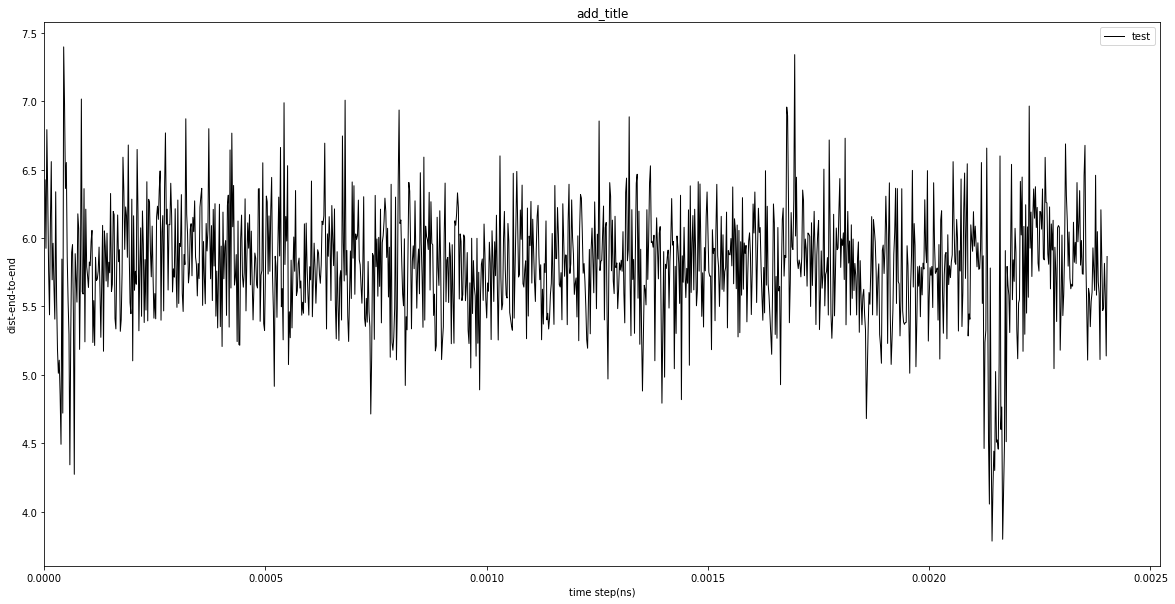

In [5]:
#this is the last step of code
test1 = read_file_and_plot(2, 'fs', 'ns', './data1/dist-end-to-end.agr', 'example1')
test1.output()

In [6]:
#### END ####